# EBITDA

## Conceptos

EBITDA significa Beneficios Antes de Intereses, Impuestos, Depreciación y Amortización. Es una medida de la rentabilidad básica de una empresa antes de considerar elementos financieros y no operativos.

### EBITDA Ajustado

El EBITDA ajustado va un paso más allá al excluir elementos extraordinarios, irregulares o no recurrentes, como:

- Costos de reestructuración
- Honorarios legales por demandas
- Venta de activos
- Costos relacionados con fusiones o adquisiciones
- Otros gastos temporales que no reflejan las operaciones continuas de la empresa

Al eliminar estos elementos irregulares, el EBITDA ajustado proporciona una medida más consistente y comparable de la rentabilidad a lo largo del tiempo y entre diferentes empresas.

Está diseñado para reflejar los beneficios reales operativos de una empresa, eliminando elementos que no forman parte de sus actividades comerciales habituales. Esto permite una evaluación más precisa de su desempeño económico.

### Margen EBITDA

El margen EBITDA es una métrica financiera que expresa el porcentaje de los ingresos que una empresa genera como ganancias antes de restar intereses, impuestos, depreciación y amortización. En otras palabras, mide qué tan eficiente es una empresa en convertir sus ingresos en beneficios operativos antes de tomar en cuenta esos gastos no operativos.

Un margen EBITDA alto indica que la empresa es muy eficiente en generar ganancias operativas a partir de sus ingresos. Es una señal de fuerte rentabilidad operativa, en cambio, un margen EBITDA bajo sugiere que la empresa tiene altos costos operativos en relación con sus ingresos, lo que puede indicar problemas en la eficiencia o altos costos de producción.

## Desarrollo



In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [125]:
ebitda = pd.read_excel('data/ebitda_y.xlsx')


La base de datos `ebitda` contiene datos del indicador EBITDA ajustado y del margen EBITDA de 13 empresas enfocadas en la electrónica de consumo a lo largo de los últimos años.

### Variables

En total, `ebitda` cuenta con 15 columnas, 12 de ellas numéricas, correspondiente al margen EBITDA y EBITDA ajustado desde el 2013 al 2024.

In [126]:
ebitda.head()

,EMPRESA,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,PAIS,MARGEN
0,Casio Computer Co Ltd,NaN,NaN,NaN,NaN,NaN,39.0,39.9,40.8,26.4,33.4,29.1,26.1,JP,AJ
1,Casio Computer Co Ltd,NaN,NaN,NaN,NaN,NaN,12.4,13.4,14.5,11.6,13.2,11.0,9.7,JP,PER
2,Funai Electric Co Ltd,-1.3,0.4,5.2,-6.0,-2.7,-8.6,1.7,-0.5,0.8,NaN,NaN,NaN,JP,AJ
3,Funai Electric Co Ltd,-0.7,0.2,2.4,-3.6,-2.0,-6.6,1.6,-0.6,1.0,NaN,NaN,NaN,JP,PER
4,Garmin Ltd,NaN,NaN,NaN,NaN,769.7,874.1,1076.8,1209.1,1408.9,1230.3,1317.3,1430.5,US,AJ


Se nota inmediatamente la presencia de datos faltantes en la gran mayoría de los años, siendo solo el intervalo entre 2018 y 2021 los únicos años con los registros completos.

In [127]:
ebitda.describe(include = 'all')

,EMPRESA,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,PAIS,MARGEN
count,26,2.000000,2.000000,4.000000,4.000000,16.000000,26.000000,26.000000,26.00000,26.000000,24.000000,24.000000,12.000000,26,26
unique,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2
top,Casio Computer Co Ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JP,AJ
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13
mean,NaN,-1.000000,0.300000,690.600000,915.750000,603.581250,365.861538,448.869231,540.65000,625.688462,679.300000,650.529167,243.608333,NaN,NaN
std,NaN,0.424264,0.141421,1371.601205,1832.177818,1141.829736,979.016985,1070.377761,1400.25983,1572.497342,1631.520331,1688.967194,440.298297,NaN,NaN
min,NaN,-1.300000,0.200000,2.400000,-6.000000,-92.700000,-240.100000,0.100000,-607.20000,-825.500000,-1788.200000,-2018.100000,2.000000,NaN,NaN
25%,NaN,-1.150000,0.250000,4.500000,-4.200000,0.700000,1.875000,5.600000,4.30000,2.350000,6.175000,3.850000,14.950000,NaN,NaN
50%,NaN,-1.000000,0.300000,6.000000,2.500000,5.850000,12.950000,24.800000,21.10000,18.050000,29.350000,19.600000,29.400000,NaN,NaN
75%,NaN,-0.850000,0.350000,692.100000,922.450000,808.400000,181.500000,233.525000,303.30000,527.325000,681.550000,537.975000,195.500000,NaN,NaN


### Datos faltantes

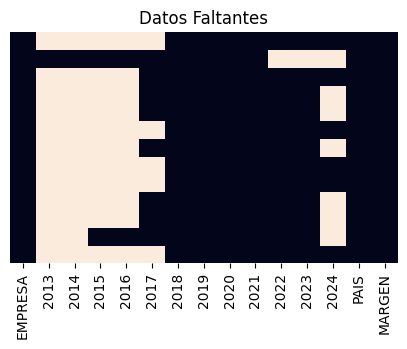

In [128]:
plt.figure(figsize=(5, 3))
sns.heatmap(ebitda.isnull(), cbar=False, yticklabels=False)
plt.title('Datos Faltantes')

plt.show()

Como se mencionaba, son 13 empresas, donde cada una cuenta con dos registros dentro del dataset, uno asociado al margen EBITDA, el cual representa el porcentaje del EBITDA sobre los ingresos, dando una idea de la rentabilidad operativa, y otro asociado al EBITDA ajustado, el cual es una versión del EBITDA que excluye elementos no recurrentes, lo que permite tener una mejor representación de las operaciones normales de una empresa.

### Empresas

In [129]:
pd.DataFrame(ebitda['EMPRESA'].unique())

,0
0,Casio Computer Co Ltd
1,Funai Electric Co Ltd
2,Garmin Ltd
3,TCL Electronics Holdings
4,Hisense Visual Technology Co L
5,Nikon Corp
6,LG Electronics Inc
7,Logitech International SA
8,Nintendo Co Ltd
9,GoPro Inc


In [130]:
df = pd.DataFrame(ebitda['PAIS'].value_counts()//2)
df['Porcentaje'] = (df['count']/13) * 100

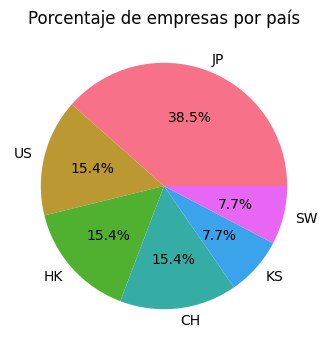

In [131]:
plt.figure(figsize=(4, 4))
colors = sns.color_palette("husl", len(df))
plt.pie(df['Porcentaje'], labels=df.index, autopct='%1.1f%%', colors=colors)
plt.title('Porcentaje de empresas por país')
plt.show()

Estas son las 13 empresas que componen el dataframe, donde el 38,5% provienen de Japón, el 15.4% China, Estados Unidos y Hong Kong cada uno,  finalmente un 7.7% de Corea del Sur y Suiza.

In [132]:
e_aj = ebitda[ebitda['MARGEN'] == 'AJ']
e_per = ebitda[ebitda['MARGEN'] == 'PER']

Para analizar mejor esos indicadores, se dividió la base de datos en dos, tomando una para el margen EBITDA y otra para el EBITDA ajustado.

## EBITDA ajustado

In [133]:
e_aj

,EMPRESA,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,PAIS,MARGEN
0,Casio Computer Co Ltd,NaN,NaN,NaN,NaN,NaN,39.0,39.9,40.8,26.4,33.4,29.1,26.1,JP,AJ
2,Funai Electric Co Ltd,-1.3,0.4,5.2,-6.0,-2.7,-8.6,1.7,-0.5,0.8,NaN,NaN,NaN,JP,AJ
4,Garmin Ltd,NaN,NaN,NaN,NaN,769.7,874.1,1076.8,1209.1,1408.9,1230.3,1317.3,1430.5,US,AJ
6,TCL Electronics Holdings,NaN,NaN,NaN,NaN,924.5,1081.1,1552.3,1787.4,756.6,2848.4,1905.1,NaN,HK,AJ
8,Hisense Visual Technology Co L,NaN,NaN,NaN,NaN,1254.0,584.0,746.0,1519.5,1580.1,2308.9,2994.6,NaN,CH,AJ
10,Nikon Corp,NaN,NaN,NaN,NaN,NaN,97.2,93.9,52.1,2.0,71.6,88.1,78.4,JP,AJ
12,LG Electronics Inc,NaN,NaN,NaN,NaN,4236.1,4703.4,4942.5,6548.0,6896.9,6536.1,6767.4,NaN,KS,AJ
14,Logitech International SA,NaN,NaN,NaN,NaN,NaN,283.0,343.8,389.2,1251.9,916.3,605.7,698.7,SW,AJ
16,Nintendo Co Ltd,NaN,NaN,NaN,NaN,NaN,186.6,259.3,361.9,651.4,603.3,515.4,546.8,JP,AJ
18,GoPro Inc,NaN,NaN,NaN,NaN,-92.7,-29.7,51.1,34.3,142.8,63.3,-60.6,NaN,US,AJ


Como cada empresa trabaja con divisas diferentes, para el correcto análisis del EBITDA ajustado, será necesario realizar la conversión de estos datos año por año según el país a USD.

Para esto se hará uso de los datos históricos proporcionados por investing.com, en Japón, Hong Kong, China y Corea del Sur. En el caso de Logitech International SA, ya se encuentra en USD.

### Conversión de monedas

In [134]:
cny = pd.read_csv('data/CNY_USD Historical Data.csv')
hkd = pd.read_csv('data/HKD_USD Historical Data.csv')
jpy = pd.read_csv('data/JPY_USD Historical Data.csv')
krw = pd.read_csv('data/KRW_USD Historical Data.csv')

In [135]:
# CNY a USD
cny['Date'] = pd.to_datetime(cny['Date'], format='%m/%d/%Y')
cny['Year'] = cny['Date'].dt.year
appy = cny.groupby('Year')['Price'].mean().reset_index()
#acny = appy.set_index('Year').to_dict()['Price']
acny = appy

# HKD a USD
hkd['Date'] = pd.to_datetime(hkd['Date'], format='%m/%d/%Y')
hkd['Year'] = hkd['Date'].dt.year
appy = hkd.groupby('Year')['Price'].mean().reset_index()
#ahkd = appy.set_index('Year').to_dict()['Price']
ahkd = appy

# JPY a USD
jpy['Date'] = pd.to_datetime(jpy['Date'], format='%m/%d/%Y')
jpy['Year'] = jpy['Date'].dt.year
appy = jpy.groupby('Year')['Price'].mean().reset_index()
#ajpy = appy.set_index('Year').to_dict()['Price']
ajpy = appy

# KRW a USD
krw['Date'] = pd.to_datetime(krw['Date'], format='%m/%d/%Y')
krw['Year'] = krw['Date'].dt.year
appy = krw.groupby('Year')['Price'].mean().reset_index()
akrw = appy
#akrw = appy.set_index('Year').to_dict()['Price']


In [136]:
# Millones a millones
eaj_ch = e_aj[e_aj['PAIS'] ==  'CH']
exchange_rates = pd.Series(acny.Price.values, index=acny.Year).to_dict()
years = [year for year in range(2013, 2025)]

for index, row in eaj_ch.iterrows():
    for year in years:
        if pd.notna(row[year]):
            eaj_ch.at[index, year] = row[year] * exchange_rates.get(year, 1)


In [137]:
# Millones a millones

eaj_hk = e_aj[e_aj['PAIS'] ==  'HK']
exchange_rates = pd.Series(ahkd.Price.values, index=ahkd.Year).to_dict()
years = [year for year in range(2013, 2025)]

for index, row in eaj_hk.iterrows():
    for year in years:
        if pd.notna(row[year]):
            eaj_hk.at[index, year] = row[year] * exchange_rates.get(year, 1)


In [138]:
# Los datos pasan de mil millones de wones a millones de dolares
eaj_ks = e_aj[e_aj['PAIS'] ==  'KS']
exchange_rates = pd.Series(akrw.Price.values, index=akrw.Year).to_dict()
years = [year for year in range(2013, 2025)]

for index, row in eaj_ks.iterrows():
    for year in years:
        if pd.notna(row[year]):
            eaj_ks.at[index, year] = row[year] * exchange_rates.get(year, 1) * 1000

In [139]:
# Los datos pasan de mil millones de yenes a millones de dolares
eaj_jp = e_aj[e_aj['PAIS'] ==  'JP']
exchange_rates = pd.Series(ajpy.Price.values, index=ajpy.Year).to_dict()
years = [year for year in range(2013, 2025)]

for index, row in eaj_jp.iterrows():
    for year in years:
        if pd.notna(row[year]):
            eaj_jp.at[index, year] = row[year] * exchange_rates.get(str(year), 1) * 1000

In [140]:
eaj_us = e_aj[e_aj['PAIS'] ==  'US']
eaj_sw = e_aj[e_aj['PAIS'] ==  'SW']

In [141]:
eaj_usd = pd.concat([eaj_ch, eaj_hk, eaj_jp, eaj_ks, eaj_us, eaj_sw], ignore_index= True)

Esta ya es la base de datos con la moneda en USD promedio según el año para todos los EBITDA de las diferentes empresas de electrónica de consumo. Ahora sí se puede realizar una comparación justa entre el rendimiento operativo de las diferentes empresas.

In [142]:
eaj_usd

,EMPRESA,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,PAIS,MARGEN
0,Hisense Visual Technology Co L,NaN,NaN,NaN,NaN,185.616115,88.400147,107.989931,220.313001,244.917316,343.572312,423.042535,NaN,CH,AJ
1,Konka Group Co Ltd,NaN,NaN,NaN,NaN,72.855065,-36.343965,4.053241,-88.038206,-127.953449,-266.090350,-285.093882,NaN,CH,AJ
2,TCL Electronics Holdings,NaN,NaN,NaN,NaN,118.636462,137.939661,198.120465,230.434746,97.339054,363.749444,243.342819,NaN,HK,AJ
3,Skyworth Group Ltd,NaN,NaN,354.444621,472.00743,262.039650,214.737259,288.278487,318.436737,525.033941,407.449437,421.950905,NaN,HK,AJ
4,Casio Computer Co Ltd,NaN,NaN,NaN,NaN,NaN,39000.000000,39900.000000,40800.000000,26400.000000,33400.000000,29100.000000,26100.0,JP,AJ
5,Funai Electric Co Ltd,-1300.0,400.0,5200.000000,-6000.00000,-2700.000000,-8600.000000,1700.000000,-500.000000,800.000000,NaN,NaN,NaN,JP,AJ
6,Nikon Corp,NaN,NaN,NaN,NaN,NaN,97200.000000,93900.000000,52100.000000,2000.000000,71600.000000,88100.000000,78400.0,JP,AJ
7,Nintendo Co Ltd,NaN,NaN,NaN,NaN,NaN,186600.000000,259300.000000,361900.000000,651400.000000,603300.000000,515400.000000,546800.0,JP,AJ
8,Sharp Corp/Japan,NaN,NaN,NaN,NaN,NaN,166200.000000,156200.000000,127500.000000,155100.000000,157100.000000,64100.000000,45900.0,JP,AJ
9,LG Electronics Inc,NaN,NaN,NaN,NaN,3747.987596,4275.976647,4244.107380,5560.002726,6028.110948,5075.533038,5183.763537,NaN,KS,AJ


In [143]:
eaj_usd.describe(include = 'all')

,EMPRESA,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,PAIS,MARGEN
count,13,1.0,1.0,2.000000,2.000000,8.000000,13.000000,13.000000,13.000000,13.000000,12.000000,12.000000,6.000000,13,13
unique,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1
top,Hisense Visual Technology Co L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JP,AJ
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,13
mean,NaN,-1300.0,400.0,2777.222310,-2763.996285,295.516861,37400.623827,42870.326885,45359.519154,65020.849832,72794.509490,58712.450493,116554.866667,NaN,NaN
std,NaN,NaN,NaN,3426.325067,4576.400342,1746.927968,67896.684172,80712.567555,102018.209683,181236.401879,173554.690913,146789.287018,212799.028593,NaN,NaN
min,NaN,-1300.0,400.0,354.444621,-6000.000000,-2700.000000,-8600.000000,4.053241,-500.000000,-127.953449,-266.090350,-285.093882,698.700000,NaN,NaN
25%,NaN,-1300.0,400.0,1565.833466,-4381.998143,31.466299,88.400147,198.120465,220.313001,244.917316,358.705161,377.298884,7597.875000,NaN,NaN
50%,NaN,-1300.0,400.0,2777.222310,-2763.996285,152.126289,283.000000,1076.800000,389.200000,1251.900000,1073.300000,961.500000,36000.000000,NaN,NaN
75%,NaN,-1300.0,400.0,3988.611155,-1145.994428,388.954738,39000.000000,39900.000000,40800.000000,6028.110948,42950.000000,37850.000000,70275.000000,NaN,NaN


### EBITDA ajustado por año

<Figure size 1200x600 with 0 Axes>

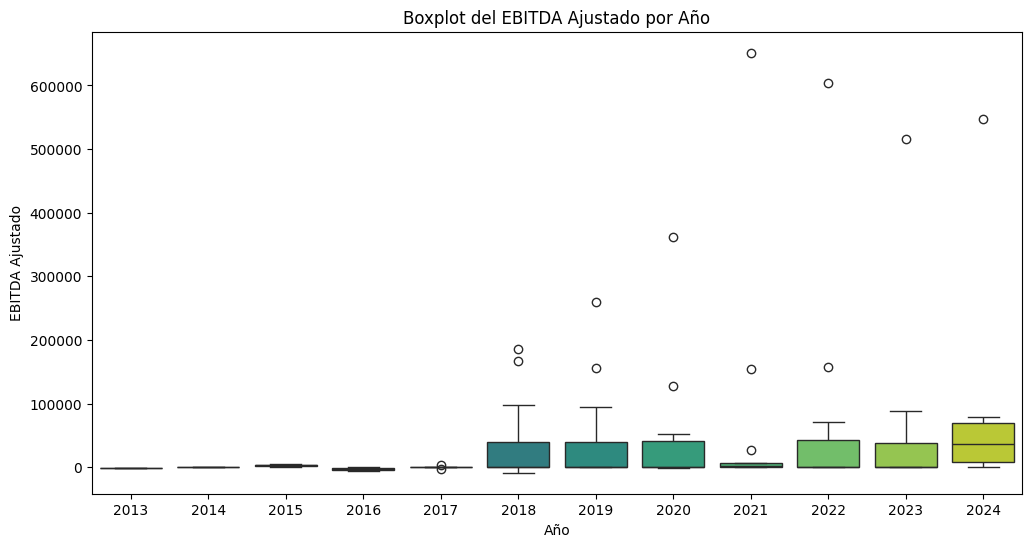

In [144]:
plt.figure(figsize=(12, 6))

temp = eaj_usd.iloc[:,1:13].melt(var_name='Año', value_name='EBITDA_Ajustado')

temp['Año'] = temp['Año'].astype(int)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='EBITDA_Ajustado', data=temp, hue = 'Año',  palette= sns.color_palette("viridis", 12), legend= False)

plt.title('Boxplot del EBITDA Ajustado por Año')
plt.xlabel('Año')
plt.ylabel('EBITDA Ajustado')

plt.show()

En cuanto al 2013 y 2014 solo se tiene un registro correspondiente a Funai Electric Co Ltd, de un EBITDA ajustado de -1.32M USD y 0.37M USD respectivamente. Para 2015 y 2016, el número de registro aumenta a 2, la medidas del EBITDA ajustado muestran una mejora significativa con valores positivos debido al nuevo registro de Skyworth Group Ltd.

A partir de 2017, aumenta el número de datos, y por tanto refleja una mayor diversidad en el rendimiento de las empresas. LLama la atención como el rango del EBITDA ajustado comienza a tomar valores negativos bastante pequeños a partir del 2020 (-500M, 361900M USD), año en el que se registró una mediana 389.2M USD, esto sugiere que algunas empresas enfrentaron dificultades mientras que otras tuvieron un buen desempeño.

También se pueden notar ciertos datos 'atípicos' bastante alejados de 2017 a 2023 correspondientes al EBITDA ajustado de Nintendo. Veamos ahora una representación gráfica del comportamiento del EBITDA ajustado para cada empresa según los años. 

### EBITDA ajustado promedio por empresa

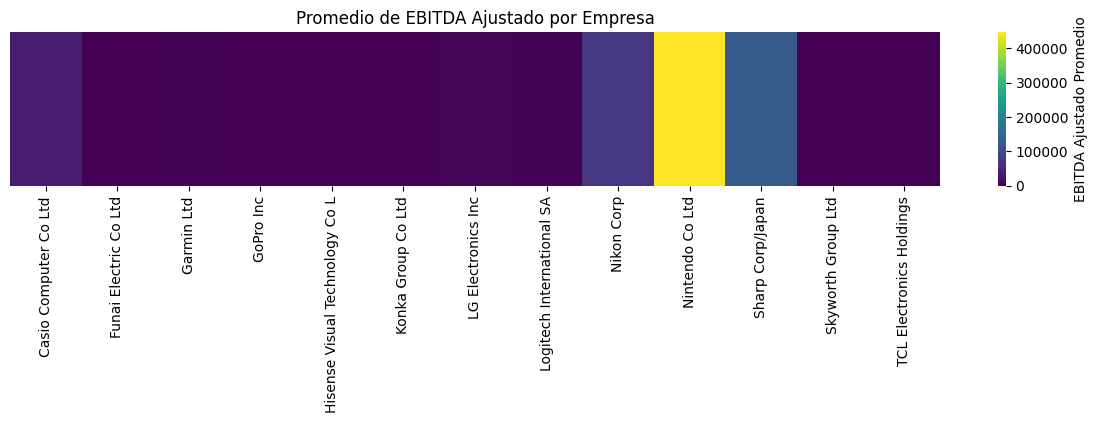

In [145]:
temp = eaj_usd.iloc[:,:13].groupby('EMPRESA').mean().mean(axis=1).reset_index(name='EBITDA Ajustado Promedio')

plt.figure(figsize=(15, 2))
sns.heatmap([temp['EBITDA Ajustado Promedio']], cmap='viridis', 
            cbar_kws={'label': 'EBITDA Ajustado Promedio'}, 
            xticklabels=temp['EMPRESA'], 
            vmin=temp['EBITDA Ajustado Promedio'].min(), 
            vmax=temp['EBITDA Ajustado Promedio'].max())

plt.title('Promedio de EBITDA Ajustado por Empresa')
plt.xticks(rotation=90)
plt.yticks([])

plt.show()


In [146]:
temp.sort_values(by='EBITDA Ajustado Promedio', ascending=False)

,EMPRESA,EBITDA Ajustado Promedio
9,Nintendo Co Ltd,446385.714286
10,Sharp Corp/Japan,124585.714286
8,Nikon Corp,69042.857143
0,Casio Computer Co Ltd,33528.571429
6,LG Electronics Inc,4873.640267
2,Garmin Ltd,1164.587500
7,Logitech International SA,641.228571
11,Skyworth Group Ltd,362.708718
4,Hisense Visual Technology Co L,230.550194
12,TCL Electronics Holdings,198.508950


Nintendo Co Ltd, la multinacional japonesa famosa por sus videojuegos y consolas, presenta el promedio más alto de EBITDA ajustado, esto ya esperaba debido a que los datos atípicos vistos en el boxplot corresponden a esta empresa, seguido de Sharp Corp/Japan (124585.7M USD), multinacional japonesa conocida por su innovación en tecnología y electrónica de consumo,  y Nikon Corp (69042.8M USD), otra multinacional japonesa conocida principalmente por su fabricación de cámaras y equipos ópticos. Es decir, las tres principales empresas con EBITDA ajustado más altos son japonesas. Por otro lado, empresas como Konka Group Co Ltd (China) y Funai Electric (Japón), tienen este indicador negativo (- 103.81M USD y -1222.2M USD respectivamente), es decir, en promedio los ingresos operativos no cubren los costos operativos ajustados y pueden reflejar problemas financieros o estructurales significativos dentro de estas empresas.

### EBITDA ajustado promedio por país

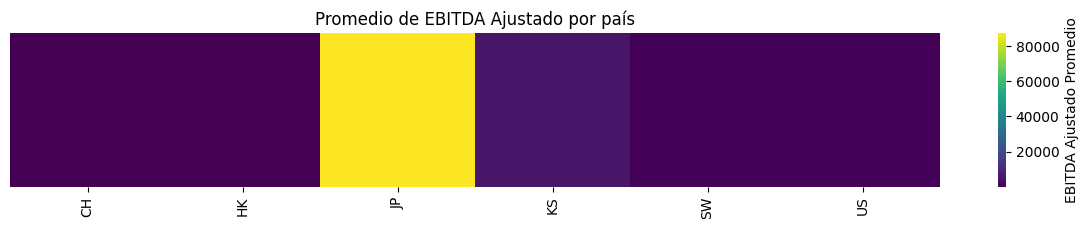

In [147]:
temp = eaj_usd.iloc[:,1:14].groupby('PAIS').mean().mean(axis=1).reset_index(name='EBITDA Ajustado Promedio')

plt.figure(figsize=(15, 2))
sns.heatmap([temp['EBITDA Ajustado Promedio']], cmap='viridis', 
            cbar_kws={'label': 'EBITDA Ajustado Promedio'}, 
            xticklabels=temp['PAIS'], 
            vmin=temp['EBITDA Ajustado Promedio'].min(), 
            vmax=temp['EBITDA Ajustado Promedio'].max())

plt.title('Promedio de EBITDA Ajustado por país')
plt.xticks(rotation=90)
plt.yticks([])

plt.show()

In [148]:
temp

,PAIS,EBITDA Ajustado Promedio
0,CH,63.374272
1,HK,304.466287
2,JP,87517.083333
3,KS,4873.640267
4,SW,641.228571
5,US,678.481250


Las empresas de Japón presentan el EBITDA ajustado promedio más alto (87517M USD), esto indica un desempeño financiero robusto en comparación con otros países, seguido de Corea del Sur (4873.6M) con LG Electronics Inc. Hong Kong y China presentan los indicadores más bajos, con 304.4M y 65.37M respectivamente.

### EBITDA ajustado por empresa

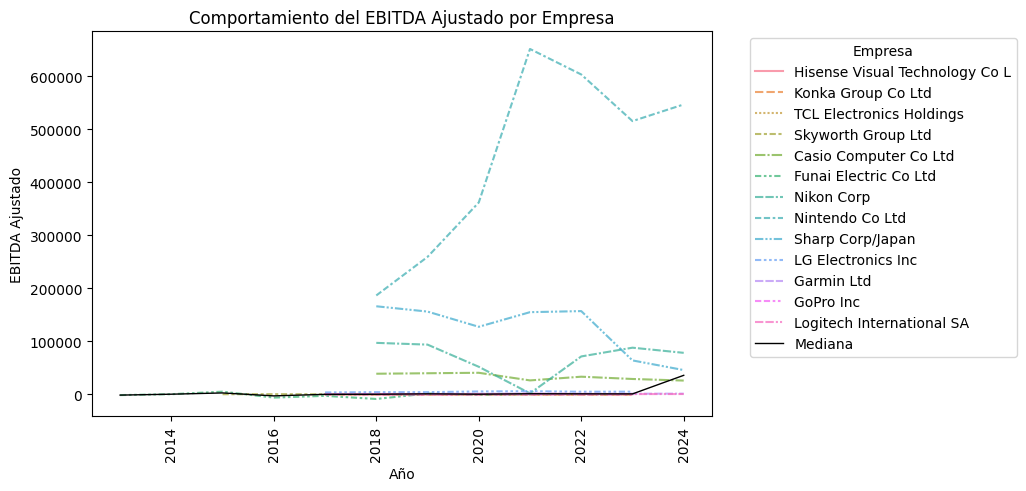

In [149]:
df_melted = eaj_usd.iloc[:,:13].melt(id_vars=['EMPRESA'], var_name='Año', value_name='Margen EBITDA')

mediana_por_año = df_melted.groupby('Año')['Margen EBITDA'].median().reset_index()

plt.figure(figsize=(8, 5))

sns.lineplot(x='Año', y='Margen EBITDA', hue='EMPRESA', data=df_melted, alpha=0.7,style='EMPRESA')

sns.lineplot(x='Año', y='Margen EBITDA', data=mediana_por_año, color='black', linewidth=1, label='Mediana')

plt.title('Comportamiento del EBITDA Ajustado por Empresa')
plt.xlabel('Año')
plt.ylabel('EBITDA Ajustado')
plt.xticks(rotation=90)
plt.legend(title='Empresa', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


Con esta representación se pueden observar la cantidad de datos faltantes por empresa y el año, por ejemplo, de LG Electronics Inc, solo se tiene registros de 2017 a 2023. Registros completos en todas las empresas, solo se tienen entre 2018 y 2023. Se podría trabajar con solo esos años o aplicar algún modelo para la imputación de datos faltantes, como ARIMA. 

Se puede notar la gran diferencia en los índices de las distintas empresas, sobresaliendo siempre las ya mencionadas en análisis anteriores como Nintendo, Sharp Corp, Nikon y Casio, todas empresas japonesas. 

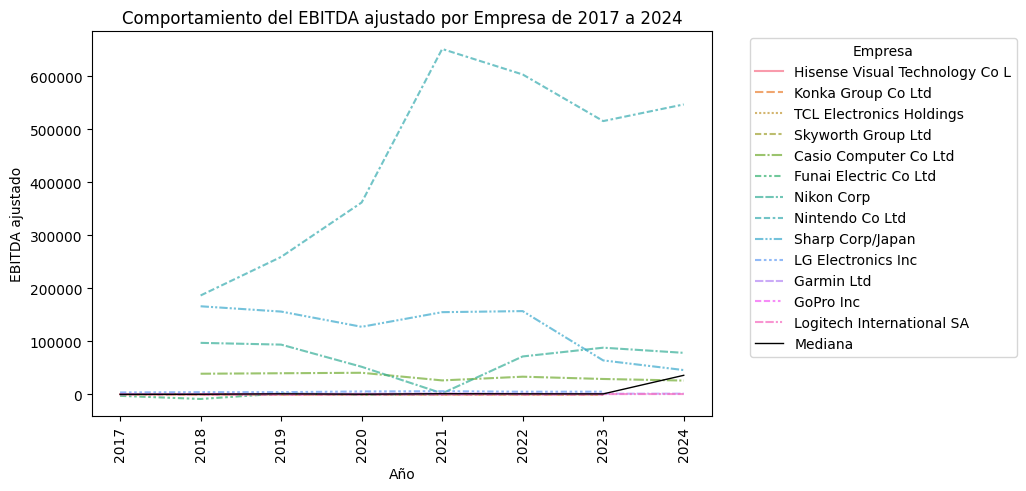

In [150]:
interes = ['EMPRESA', 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
df_melted = eaj_usd[interes].melt(id_vars=['EMPRESA'], var_name='Año', value_name='EBITDA ajustado')

mediana_por_año = df_melted.groupby('Año')['EBITDA ajustado'].median().reset_index()

plt.figure(figsize=(8, 5))

sns.lineplot(x='Año', y='EBITDA ajustado', hue='EMPRESA', data=df_melted, alpha=0.7,style='EMPRESA')

sns.lineplot(x='Año', y='EBITDA ajustado', data=mediana_por_año, color='black', linewidth=1, label='Mediana')

plt.title('Comportamiento del EBITDA ajustado por Empresa de 2017 a 2024')
plt.xlabel('Año')
plt.ylabel('EBITDA ajustado')
plt.xticks(rotation=90)
plt.legend(title='Empresa', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [151]:
missing_data = eaj_usd[eaj_usd[2024].isna()]
print(missing_data[['EMPRESA', 'PAIS']])

                           EMPRESA PAIS
0   Hisense Visual Technology Co L   CH
1               Konka Group Co Ltd   CH
2         TCL Electronics Holdings   HK
3               Skyworth Group Ltd   HK
5            Funai Electric Co Ltd   JP
9               LG Electronics Inc   KS
11                       GoPro Inc   US


In [152]:
missing_data = eaj_usd[eaj_usd[2017].isna()]
print(missing_data[['EMPRESA', 'PAIS']])

                      EMPRESA PAIS
4       Casio Computer Co Ltd   JP
6                  Nikon Corp   JP
7             Nintendo Co Ltd   JP
8            Sharp Corp/Japan   JP
12  Logitech International SA   SW


Aquí nos centramos en los años con más registros, es decir, del 2017 al 2024, debido a que el porcentaje de valores faltantes para años anteriores es alto, llegando a ser incluso a ser del 92,3%. Para abordar aquellos pocos datos faltantes se realizará imputación de datos con la mediana o media en las columnas del 2017, 2022, 2023 y 2024, sin embargo, parece que se realizará con la mediana debido a la distribución de los datos observada en los boxplot.

### Pruebas de normalidad

In [153]:
# Para 2017
stat, p_value = stats.shapiro(eaj_usd[2017])

if p_value > 0.05:
    print("No se puede rechazar la hipótesis nula: los datos parecen tener una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución normal.")

Se rechaza la hipótesis nula: los datos no siguen una distribución normal.


In [154]:
# Para 2022
stat, p_value = stats.shapiro(eaj_usd[2022])

if p_value > 0.05:
    print("No se puede rechazar la hipótesis nula: los datos parecen tener una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución normal.")

Se rechaza la hipótesis nula: los datos no siguen una distribución normal.


In [155]:
# Para 2023
stat, p_value = stats.shapiro(eaj_usd[2023])

if p_value > 0.05:
    print("No se puede rechazar la hipótesis nula: los datos parecen tener una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución normal.")

Se rechaza la hipótesis nula: los datos no siguen una distribución normal.


In [156]:
# Para 2024
stat, p_value = stats.shapiro(eaj_usd[2024])

if p_value > 0.05:
    print("No se puede rechazar la hipótesis nula: los datos parecen tener una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución normal.")

Se rechaza la hipótesis nula: los datos no siguen una distribución normal.


In [157]:
eaj_usd[2017].fillna(eaj_usd[2017].median())
eaj_usd[2022] = eaj_usd[2022].fillna(eaj_usd[2022].median())
eaj_usd[2023] = eaj_usd[2023].fillna(eaj_usd[2023].median())
eaj_usd[2024].fillna(eaj_usd[2024].median())

0      36000.0
1      36000.0
2      36000.0
3      36000.0
4      26100.0
5      36000.0
6      78400.0
7     546800.0
8      45900.0
9      36000.0
10      1430.5
11     36000.0
12       698.7
Name: 2024, dtype: float64

In [158]:
eaj_usd = eaj_usd.drop(columns=[2013, 2014, 2015, 2016])

In [159]:
eaj_usd

,EMPRESA,2017,2018,2019,2020,2021,2022,2023,2024,PAIS,MARGEN
0,Hisense Visual Technology Co L,185.616115,88.400147,107.989931,220.313001,244.917316,343.572312,423.042535,NaN,CH,AJ
1,Konka Group Co Ltd,72.855065,-36.343965,4.053241,-88.038206,-127.953449,-266.090350,-285.093882,NaN,CH,AJ
2,TCL Electronics Holdings,118.636462,137.939661,198.120465,230.434746,97.339054,363.749444,243.342819,NaN,HK,AJ
3,Skyworth Group Ltd,262.039650,214.737259,288.278487,318.436737,525.033941,407.449437,421.950905,NaN,HK,AJ
4,Casio Computer Co Ltd,NaN,39000.000000,39900.000000,40800.000000,26400.000000,33400.000000,29100.000000,26100.0,JP,AJ
5,Funai Electric Co Ltd,-2700.000000,-8600.000000,1700.000000,-500.000000,800.000000,1073.300000,961.500000,NaN,JP,AJ
6,Nikon Corp,NaN,97200.000000,93900.000000,52100.000000,2000.000000,71600.000000,88100.000000,78400.0,JP,AJ
7,Nintendo Co Ltd,NaN,186600.000000,259300.000000,361900.000000,651400.000000,603300.000000,515400.000000,546800.0,JP,AJ
8,Sharp Corp/Japan,NaN,166200.000000,156200.000000,127500.000000,155100.000000,157100.000000,64100.000000,45900.0,JP,AJ
9,LG Electronics Inc,3747.987596,4275.976647,4244.107380,5560.002726,6028.110948,5075.533038,5183.763537,NaN,KS,AJ


### Imputación con IterativeImputer()

In [160]:
iterative_imputer = IterativeImputer()
numeric_columns = eaj_usd.select_dtypes(include='number')


eaj_usd_imputed = pd.DataFrame(iterative_imputer.fit_transform(numeric_columns), columns=numeric_columns.columns)

eaj_usd[numeric_columns.columns] = eaj_usd_imputed

In [161]:
eaj_usd

,EMPRESA,2017,2018,2019,2020,2021,2022,2023,2024,PAIS,MARGEN
0,Hisense Visual Technology Co L,185.616115,88.400147,107.989931,220.313001,244.917316,343.572312,423.042535,472.830372,CH,AJ
1,Konka Group Co Ltd,72.855065,-36.343965,4.053241,-88.038206,-127.953449,-266.090350,-285.093882,-264.908523,CH,AJ
2,TCL Electronics Holdings,118.636462,137.939661,198.120465,230.434746,97.339054,363.749444,243.342819,295.315798,HK,AJ
3,Skyworth Group Ltd,262.039650,214.737259,288.278487,318.436737,525.033941,407.449437,421.950905,493.861863,HK,AJ
4,Casio Computer Co Ltd,28418.849742,39000.000000,39900.000000,40800.000000,26400.000000,33400.000000,29100.000000,26100.000000,JP,AJ
5,Funai Electric Co Ltd,-2700.000000,-8600.000000,1700.000000,-500.000000,800.000000,1073.300000,961.500000,4630.838031,JP,AJ
6,Nikon Corp,53868.363878,97200.000000,93900.000000,52100.000000,2000.000000,71600.000000,88100.000000,78400.000000,JP,AJ
7,Nintendo Co Ltd,237365.454128,186600.000000,259300.000000,361900.000000,651400.000000,603300.000000,515400.000000,546800.000000,JP,AJ
8,Sharp Corp/Japan,110540.347549,166200.000000,156200.000000,127500.000000,155100.000000,157100.000000,64100.000000,45900.000000,JP,AJ
9,LG Electronics Inc,3747.987596,4275.976647,4244.107380,5560.002726,6028.110948,5075.533038,5183.763537,5091.207875,KS,AJ


Se decidió conservar solo aquellas columnas que tenían menos del 60% de datos faltantes y se realizó con IterativeImputer de scikit-learn, el cual realiza imputaciones múltiples usando modelos predictivos.

### EBITDA por empresa sin datos faltantes

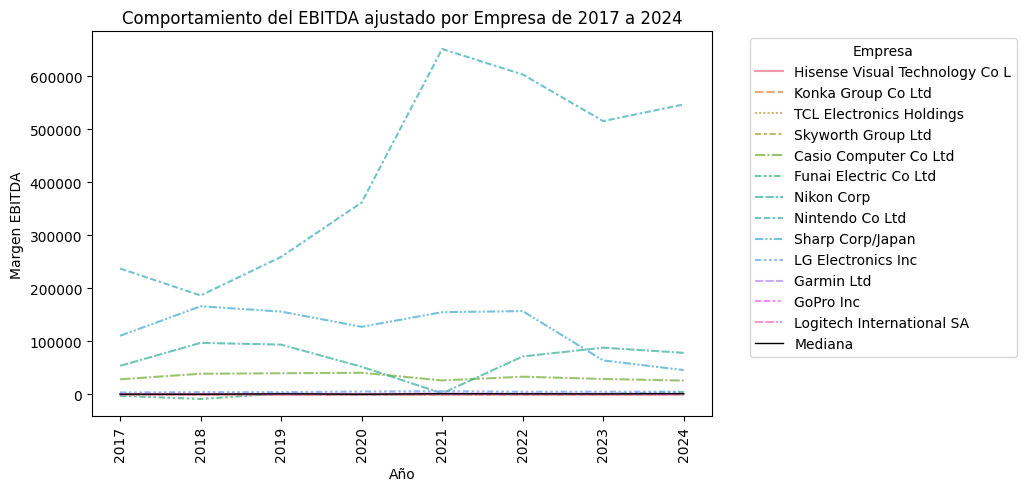

In [180]:
interes = ['EMPRESA', 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
df_melted = eaj_usd[interes].melt(id_vars=['EMPRESA'], var_name='Año', value_name='Margen EBITDA')

mediana_por_año = df_melted.groupby('Año')['Margen EBITDA'].median().reset_index()

plt.figure(figsize=(8, 5))

sns.lineplot(x='Año', y='Margen EBITDA', hue='EMPRESA', data=df_melted, alpha=0.7,style='EMPRESA')

sns.lineplot(x='Año', y='Margen EBITDA', data=mediana_por_año, color='black', linewidth=1, label='Mediana')

plt.title('Comportamiento del EBITDA ajustado por Empresa de 2017 a 2024')
plt.xlabel('Año')
plt.ylabel('Margen EBITDA')
plt.xticks(rotation=90)
plt.legend(title='Empresa', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Y este es la nueva distribución del EBITDA ajustado luego de imputar datos faltantes.

## Margen EBITDA

Ahora revisemos el subconjunto de datos relacionado al margen EBITDA. Para este no es necesario realizar la conversión de moneda debido a que se expresa como un porcentaje de los ingreso, es decir, es una proporción y no un valor absoluto.

In [163]:
e_per

,EMPRESA,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,PAIS,MARGEN
1,Casio Computer Co Ltd,NaN,NaN,NaN,NaN,NaN,12.4,13.4,14.5,11.6,13.2,11.0,9.7,JP,PER
3,Funai Electric Co Ltd,-0.7,0.2,2.4,-3.6,-2.0,-6.6,1.6,-0.6,1.0,NaN,NaN,NaN,JP,PER
5,Garmin Ltd,NaN,NaN,NaN,NaN,24.7,26.1,28.7,28.9,28.3,25.3,25.2,25.3,US,PER
7,TCL Electronics Holdings,NaN,NaN,NaN,NaN,2.3,2.4,3.3,3.5,1.0,4.0,2.4,NaN,HK,PER
9,Hisense Visual Technology Co L,NaN,NaN,NaN,NaN,3.8,1.7,2.2,3.9,3.4,5.0,5.6,NaN,CH,PER
11,Nikon Corp,NaN,NaN,NaN,NaN,NaN,13.5,13.2,8.8,0.5,13.3,14.0,10.9,JP,PER
13,LG Electronics Inc,NaN,NaN,NaN,NaN,6.9,7.7,7.9,11.3,9.3,7.8,8.0,NaN,KS,PER
15,Logitech International SA,NaN,NaN,NaN,NaN,NaN,11.0,12.3,13.1,23.8,16.7,13.3,16.3,SW,PER
17,Nintendo Co Ltd,NaN,NaN,NaN,NaN,NaN,17.7,21.6,27.7,37.0,35.6,32.2,32.7,JP,PER
19,GoPro Inc,NaN,NaN,NaN,NaN,-7.9,-2.6,4.3,3.8,12.3,5.8,-6.0,NaN,US,PER


Al igual que con el EBITDA ajustado, se nota una gran cantidad de datos faltantes. La distribución por países es la misma que el ajustado.

In [164]:
e_per.describe(include= 'all')

,EMPRESA,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,PAIS,MARGEN
count,13,1.0,1.0,2.00000,2.000000,8.00000,13.000000,13.000000,13.000000,13.000000,12.000000,12.000000,6.000000,13,13
unique,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1
top,Casio Computer Co Ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JP,PER
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,13
mean,NaN,-0.7,0.2,4.60000,2.500000,4.27500,7.169231,9.261538,9.600000,10.730769,11.008333,8.433333,16.150000,NaN,NaN
std,NaN,NaN,NaN,3.11127,8.626703,9.43576,8.949151,8.415218,9.559986,11.947621,10.956315,12.067487,11.198527,NaN,NaN
min,NaN,-0.7,0.2,2.40000,-3.600000,-7.90000,-6.600000,0.100000,-1.200000,-1.700000,-6.000000,-11.300000,2.000000,NaN,NaN
25%,NaN,-0.7,0.2,3.50000,-0.550000,0.70000,1.700000,3.300000,3.800000,1.000000,5.075000,2.475000,10.000000,NaN,NaN
50%,NaN,-0.7,0.2,4.60000,2.500000,3.05000,6.800000,6.500000,5.600000,6.600000,7.050000,6.800000,13.600000,NaN,NaN
75%,NaN,-0.7,0.2,5.70000,5.550000,5.32500,12.400000,13.200000,13.100000,12.300000,14.150000,13.475000,23.050000,NaN,NaN


### Margen EBITDA por año

<Figure size 1200x600 with 0 Axes>

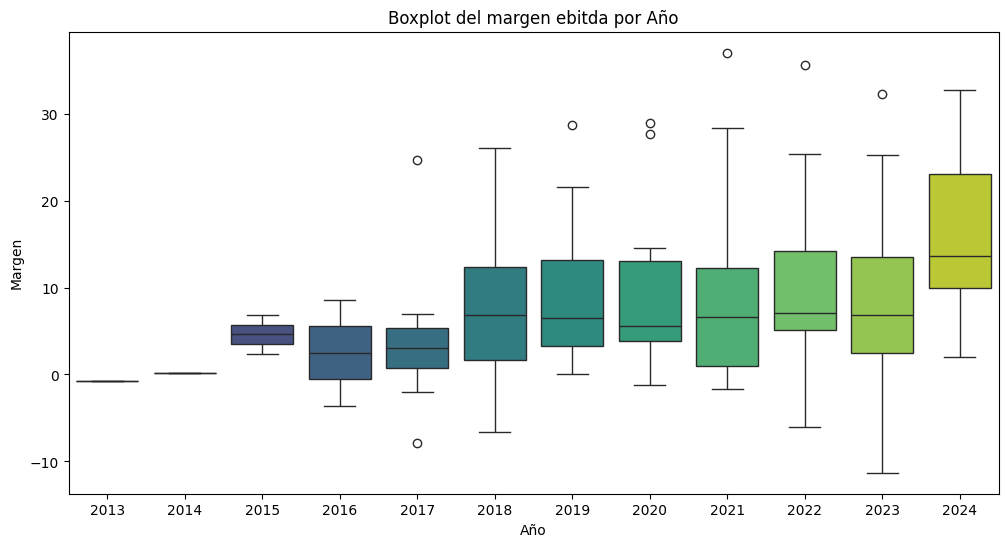

In [165]:
plt.figure(figsize=(12, 6))

temp = e_per.iloc[:,1:13].melt(var_name='Año', value_name='Margen')

temp['Año'] = temp['Año'].astype(int)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Margen', data=temp, hue = 'Año',  palette= sns.color_palette("viridis", 12), legend= False)

plt.title('Boxplot del margen ebitda por Año')
plt.xlabel('Año')
plt.ylabel('Margen')

plt.show()

Aquí se nota la presencia de datos atípicos por debajo de la mediana, situación que no se veía en el EBITDA ajustado. También parece haber un aumento en margen EBITDA de lo que va del 2024, el cual presenta un rango de valores mayor al de otros años. Debido a que ahora se habla de porcentajes, es más fácil visualizar la distribución por año dado que los datos atípicos no están tan alejados como en el caso del ajustado.

Se observa una mediana del margen EBITDA similar de 2018 a 2023, que va desde 5.6% en 2020 hasta 7.05% en 2022. Nuevamente, de 2013 a 2014 no es visualizar nada debido a que solo hay una observación de -0.7 y 0.2 respectivamente. En 2023 se nota el mayor rango de valores de este margen, es decir, una mayor variabilidad que podría deberse a cambios en el mercado, eventos económicos, ajustes contables, entre otros factores.



### Promedio de margen EBITDA por empresa

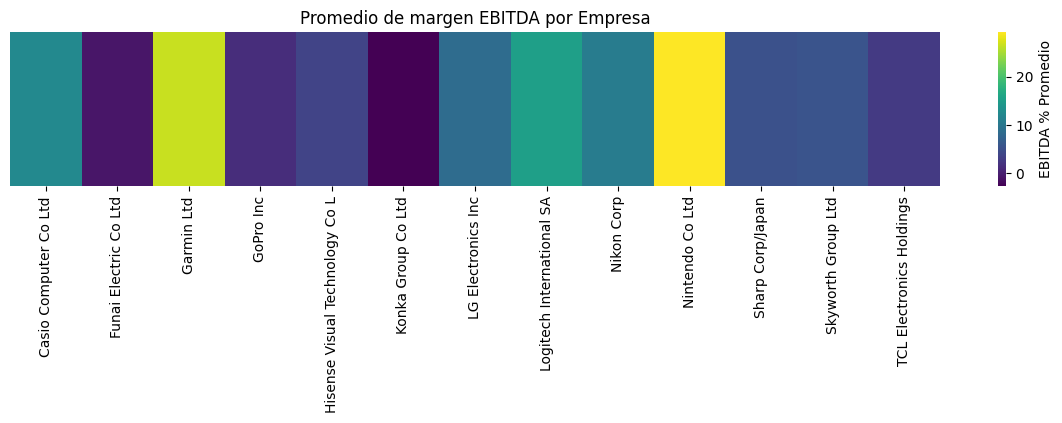

In [166]:
temp = e_per.iloc[:,:13].groupby('EMPRESA').mean().mean(axis=1).reset_index(name='Margen EBITDA promedio')

plt.figure(figsize=(15, 2))
sns.heatmap([temp['Margen EBITDA promedio']], cmap='viridis', 
            cbar_kws={'label': 'EBITDA % Promedio'}, 
            xticklabels=temp['EMPRESA'], 
            vmin=temp['Margen EBITDA promedio'].min(), 
            vmax=temp['Margen EBITDA promedio'].max())

plt.title('Promedio de margen EBITDA por Empresa')
plt.xticks(rotation=90)
plt.yticks([])

plt.show()

In [167]:
temp.sort_values(by = 'Margen EBITDA promedio', ascending= False).head()

,EMPRESA,Margen EBITDA promedio
9,Nintendo Co Ltd,29.214286
2,Garmin Ltd,26.562500
7,Logitech International SA,15.214286
0,Casio Computer Co Ltd,12.257143
8,Nikon Corp,10.600000


Podemos ver que la empresa con mayor EBITDA ajustado reaparece como la empresa con mayor margen EBITDA, sugiriendo no solo eficiencia en su operación, sino también que es una empresa rentable, estable y sostenible. Aparece también, como el segundo margen EBITDA más alto, Garmin Ltd, que si bien obtuvo un EBITDA ajustado alto, no fue de los tres primeros, pero esto podría dar indicios de que a pesar de los ajustes, la empresa sigue siendo operativamente fuerte y eficiente. 

### Promedio de margen EBITDA por país

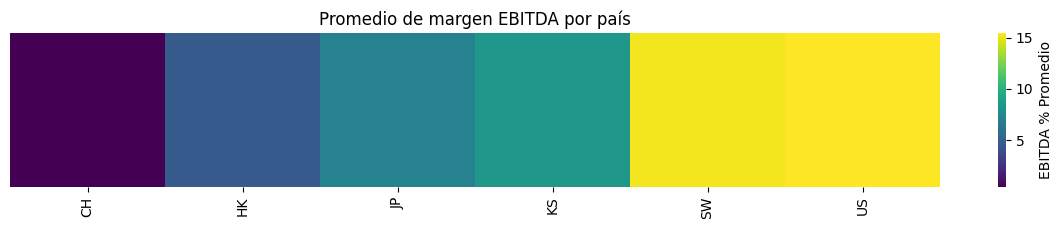

In [168]:
temp = e_per.iloc[:,1:14].groupby('PAIS').mean().mean(axis=1).reset_index(name='Margen EBITDA promedio')

plt.figure(figsize=(15, 2))
sns.heatmap([temp['Margen EBITDA promedio']], cmap='viridis', 
            cbar_kws={'label': 'EBITDA % Promedio'}, 
            xticklabels=temp['PAIS'], 
            vmin=temp['Margen EBITDA promedio'].min(), 
            vmax=temp['Margen EBITDA promedio'].max())

plt.title('Promedio de margen EBITDA por país')
plt.xticks(rotation=90)
plt.yticks([])

plt.show()

In [169]:
temp.sort_values(by = 'Margen EBITDA promedio', ascending= False)

,PAIS,Margen EBITDA promedio
5,US,15.468750
4,SW,15.214286
3,KS,8.414286
2,JP,7.055833
1,HK,4.716667
0,CH,0.471429


A diferencia del EBITDA ajustado, las empresas con mayor margen EBITDA están en Estados Unidos y Suiza (15.46% y 15.21% respectivamente), y no en Japón (7.05%) como se hubiese podido esperar. Hong Kong y China se mantienen como los países con valores menores de este estimador.

### Imputación con IterativeImputer

Al igual con el EBITDA ajustado, se eliminarán las mismas columnas y se realizará imputación con IterativeImputer()

In [170]:
guardar = e_per

In [171]:
e_per = e_per.drop(columns=[2013, 2014, 2015, 2016])

In [172]:
numeric_columns = e_per.select_dtypes(include='number')

iterative_imputer = IterativeImputer()
e_per_imputed = pd.DataFrame(iterative_imputer.fit_transform(numeric_columns), columns=numeric_columns.columns, index=numeric_columns.index)

e_per[numeric_columns.columns] = e_per_imputed

In [173]:
e_per

,EMPRESA,2017,2018,2019,2020,2021,2022,2023,2024,PAIS,MARGEN
1,Casio Computer Co Ltd,7.136587,12.4,13.4,14.5,11.6,13.200000,11.00000,9.700000,JP,PER
3,Funai Electric Co Ltd,-2.000000,-6.6,1.6,-0.6,1.0,6.442368,2.29071,8.045026,JP,PER
5,Garmin Ltd,24.700000,26.1,28.7,28.9,28.3,25.300000,25.20000,25.300000,US,PER
7,TCL Electronics Holdings,2.300000,2.4,3.3,3.5,1.0,4.000000,2.40000,6.257044,HK,PER
9,Hisense Visual Technology Co L,3.800000,1.7,2.2,3.9,3.4,5.000000,5.60000,11.643285,CH,PER
11,Nikon Corp,13.626581,13.5,13.2,8.8,0.5,13.300000,14.00000,10.900000,JP,PER
13,LG Electronics Inc,6.900000,7.7,7.9,11.3,9.3,7.800000,8.00000,12.199473,KS,PER
15,Logitech International SA,3.801721,11.0,12.3,13.1,23.8,16.700000,13.30000,16.300000,SW,PER
17,Nintendo Co Ltd,15.344055,17.7,21.6,27.7,37.0,35.600000,32.20000,32.700000,JP,PER
19,GoPro Inc,-7.900000,-2.6,4.3,3.8,12.3,5.800000,-6.00000,0.071051,US,PER


### Margen EBITDA por empresa sin datos faltantes

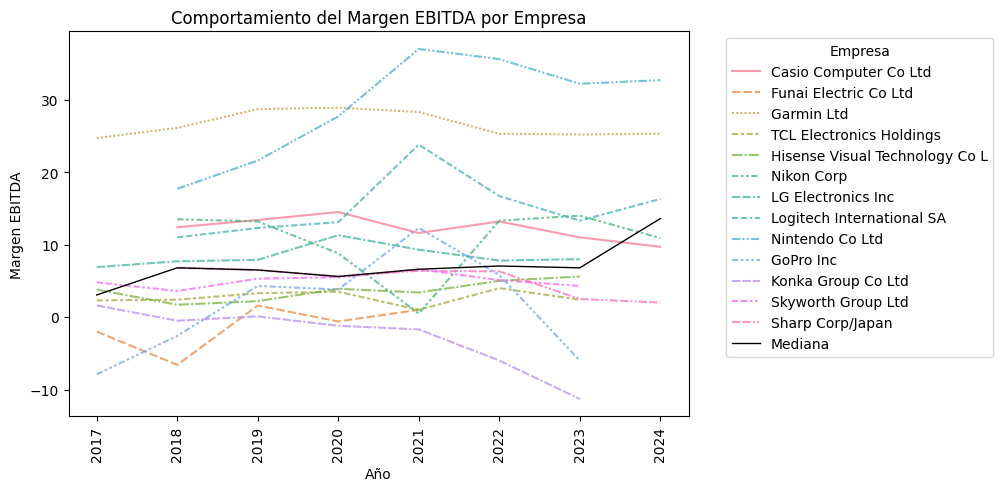

In [174]:
guardar = guardar.drop(columns=[2013, 2014, 2015, 2016])

df_melted = guardar.iloc[:,:9].melt(id_vars=['EMPRESA'], var_name='Año', value_name='Margen EBITDA')

mediana_por_año = df_melted.groupby('Año')['Margen EBITDA'].median().reset_index()

plt.figure(figsize=(8, 5))

sns.lineplot(x='Año', y='Margen EBITDA', hue='EMPRESA', data=df_melted, alpha=0.7,style='EMPRESA')

sns.lineplot(x='Año', y='Margen EBITDA', data=mediana_por_año, color='black', linewidth=1, label='Mediana')

plt.title('Comportamiento del Margen EBITDA por Empresa')
plt.xlabel('Año')
plt.ylabel('Margen EBITDA')
plt.xticks(rotation=90)
plt.legend(title='Empresa', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Este corresponde al mergen de EBITDA antes de la imputación de datos, se pueden observar varios datos faltantes sobre todo para 2017 y 2024, de igual manera en con el EBITDA ajustado.

También llama la atención como 2021 tuvo varios picos ascendentes para empresas como Nintendo, Logitech y GoPro, y descendentes para empresas como Nikon.

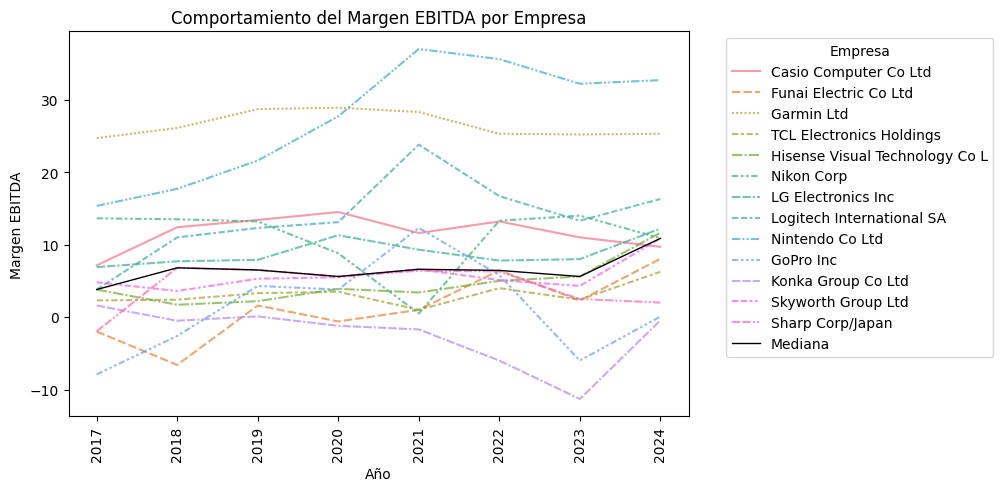

In [175]:
df_melted = e_per.iloc[:,:9].melt(id_vars=['EMPRESA'], var_name='Año', value_name='Margen EBITDA')

mediana_por_año = df_melted.groupby('Año')['Margen EBITDA'].median().reset_index()

plt.figure(figsize=(8, 5))

sns.lineplot(x='Año', y='Margen EBITDA', hue='EMPRESA', data=df_melted, alpha=0.7,style='EMPRESA')

sns.lineplot(x='Año', y='Margen EBITDA', data=mediana_por_año, color='black', linewidth=1, label='Mediana')

plt.title('Comportamiento del Margen EBITDA por Empresa')
plt.xlabel('Año')
plt.ylabel('Margen EBITDA')
plt.xticks(rotation=90)
plt.legend(title='Empresa', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

El uso IterativeImputer, imputó en el margen de EBITDA para 2024 una mejora en la todas las empresas. Por la mediana, este margen un aumento en lo que va del año, siento el cambio más abrupto desde el 2017.

### Scatterplot entre EBITDA y Margen EBITDA

Situaciones las observadas en el EBITDA ajustado y el margen EBITDA llevan a cuestionarse si existe una relación totalmente lineal entre ambos indicadores, debido a que los EBITDa ajustados más altos no necesariamente fueron los márgenes más altos. 

In [ ]:
country_order = ['CH', 'HK', 'JP', 'KS', 'US', 'SW']
e_per['PAIS'] = pd.Categorical(e_per['PAIS'], categories=country_order, ordered=True)
e_per = e_per.sort_values(by='PAIS')
e_per = e_per.reset_index(drop=True)

In [178]:
long_df = pd.DataFrame(columns=['Margen','Ajustado'])

for i in range(2017,2025):
    long_df = pd.concat([
        long_df,
        pd.DataFrame({
            'Margen': e_per[i],
            'Ajustado': eaj_usd[i]
        })
    ], ignore_index=True)



C:\Users\Valen\AppData\Local\Temp\ipykernel_15268\2224129711.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  long_df = pd.concat([


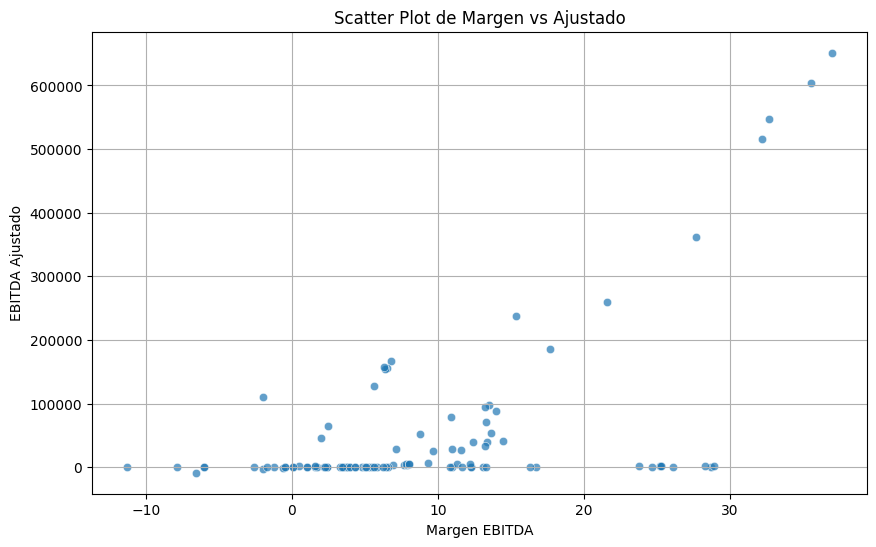

In [179]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=long_df, x='Margen', y='Ajustado', alpha=0.7)
plt.title('Scatter Plot de Margen vs Ajustado')
plt.xlabel('Margen EBITDA')
plt.ylabel('EBITDA Ajustado')
plt.grid(True)
plt.show()

Se puede observar cierta relación creciente entre ambas variables, sin embargo también destaca una gran concetración de datos con EBITDA ajustados bajos pero márgenes de EBITDA altos, como el caso visto de Garmin Ltd. 